In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('sales_v2.csv')
data.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


In [3]:
import matplotlib.pyplot as plt

In [4]:
data_1 = data['region'].value_counts().to_frame(name='rows_number')
data_1.reset_index(inplace= True )
data_1

,region,rows_number
0,Амурская область,218842
1,Московская область,217496
2,Хабаровский край,174621
3,Ленинградская область,173933
4,Приморский край,132490
5,Краснодарский край,131607
6,Иркутская область,130660
7,Ставропольский край,109183
8,Владимирская область,89251
9,Красноярский край,88954


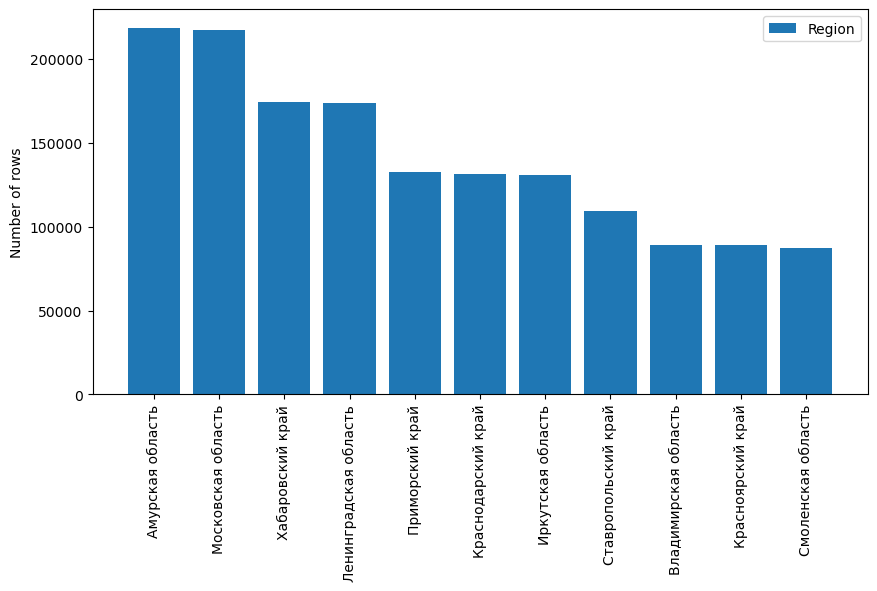

In [13]:
plt.figure(figsize=(10, 5))

x = data_1['region']
y = data_1['rows_number']

plt.bar(x, y, label='Region')
plt.ylabel('Number of rows')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554192 entries, 0 to 1554191
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   order_id     1554192 non-null  int64         
 1   date         1554192 non-null  datetime64[ns]
 2   customer_id  1554192 non-null  int64         
 3   category     1554192 non-null  object        
 4   region       1554192 non-null  object        
 5   sales        1554192 non-null  int64         
 6   quantity     1554192 non-null  int64         
 7   discount     1554192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 94.9+ MB


In [20]:
data['date'] = pd.to_datetime(data['date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554192 entries, 0 to 1554191
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   order_id     1554192 non-null  int64         
 1   date         1554192 non-null  datetime64[ns]
 2   customer_id  1554192 non-null  int64         
 3   category     1554192 non-null  object        
 4   region       1554192 non-null  object        
 5   sales        1554192 non-null  int64         
 6   quantity     1554192 non-null  int64         
 7   discount     1554192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 94.9+ MB


In [25]:
df = data.groupby(['region', data.date.dt.month])['sales'].sum().reset_index()
df.head()

,region,date,sales
0,Амурская область,1,52500485
1,Амурская область,2,59147984
2,Амурская область,3,82116298
3,Амурская область,4,94639583
4,Амурская область,5,109038878


In [28]:
sales_region = df.pivot_table(index='date', columns='region', values='sales', aggfunc='sum')
sales_region

region,Амурская область,Владимирская область,Иркутская область,Краснодарский край,Красноярский край,Ленинградская область,Московская область,Приморский край,Смоленская область,Ставропольский край,Хабаровский край
date,,,,,,,,,,,
1,52500485,21611129,30858307,31929968,21218077,41816813,52652307,32315161,20292014,25928689,41572924
2,59147984,24249009,34630915,34373935,24191128,47523339,59170142,36024232,23462118,28703821,45661092
3,82116298,32389536,49669273,48641871,32688939,64563321,81359201,49564920,32905545,40687350,64186578
4,94639583,39383056,55834307,56024594,39374175,74570992,92685708,57076737,37611684,47485342,75163897
5,109038878,43186011,64134603,64831768,44095031,86006349,105752450,66520808,42032181,53338689,86611004
6,107458856,44999025,64393075,65004800,43295238,84161267,106781864,65175990,42698611,53820798,86103274
7,104680564,43321626,62728759,63107584,42095733,83058836,105592541,63802759,41610198,51895523,83590708
8,92834003,36217443,55496758,56334356,37614957,72486258,90727175,54283341,36089863,46759406,72096041
9,72731693,30596665,44027400,45154125,29063423,58772119,72295718,44550342,29797907,37111977,58432828
